<a href="https://colab.research.google.com/github/markos-merge/machine_learning_assignment_1/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

#**Ερώτημα 1**


#Read csv file

In [66]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [67]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Plot Variables

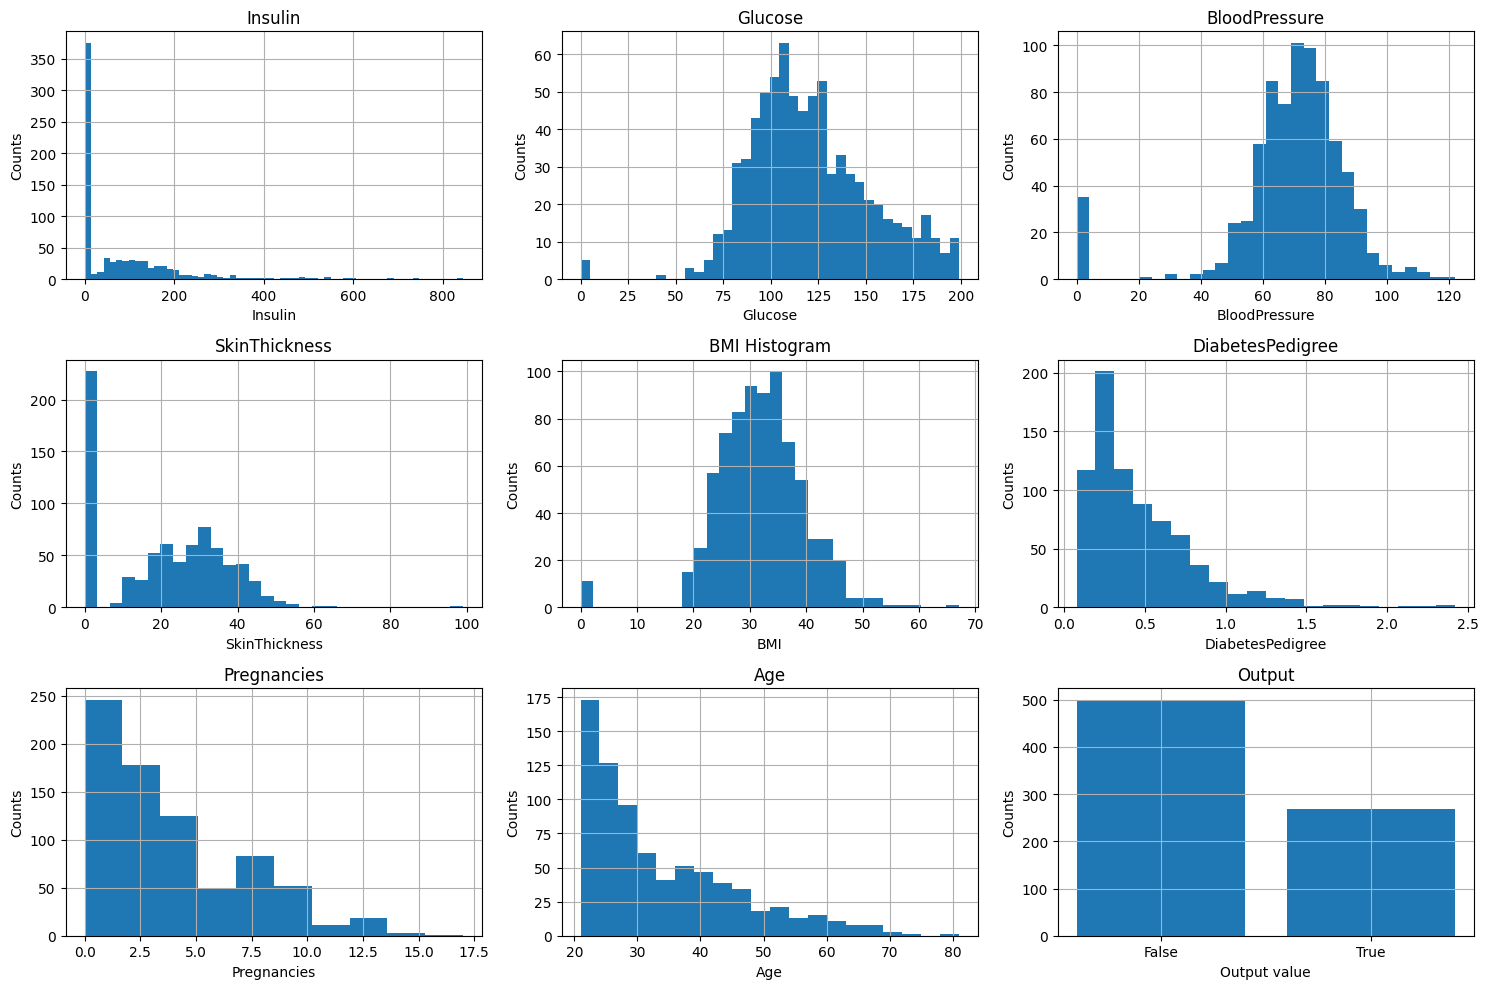

In [68]:
fig, a = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
df['Insulin'].hist(bins=60 , ax=a[0, 0])
a[0, 0].set_title('Insulin')
a[0, 0].set_xlabel('Insulin')
a[0, 0].set_ylabel('Counts')

df['Glucose'].hist(bins=40, ax=a[0,1])
a[0,1].set_title('Glucose')
a[0,1].set_xlabel('Glucose')
a[0,1].set_ylabel('Counts')

df['BloodPressure'].hist(bins=30, ax=a[0,2])
a[0,2].set_title('BloodPressure')
a[0,2].set_xlabel('BloodPressure')
a[0,2].set_ylabel('Counts')

df['SkinThickness'].hist(bins=30, ax=a[1,0])
a[1,0].set_title('SkinThickness')
a[1,0].set_xlabel('SkinThickness')
a[1,0].set_ylabel('Counts')

df['BMI'].hist(bins=30, ax=a[1,1])
a[1,1].set_title('BMI Histogram')
a[1,1].set_xlabel('BMI')
a[1,1].set_ylabel('Counts')

df['DiabetesPedigreeFunction'].hist(bins=20, ax=a[1,2])
a[1,2].set_title('DiabetesPedigree')
a[1,2].set_xlabel('DiabetesPedigree')
a[1,2].set_ylabel('Counts')

df['Pregnancies'].hist(bins=10, ax=a[2,0])
a[2,0].set_title('Pregnancies')
a[2,0].set_xlabel('Pregnancies')
a[2,0].set_ylabel('Counts')

df['Age'].hist(bins=20, ax=a[2,1])
a[2,1].set_title('Age')
a[2,1].set_xlabel('Age')
a[2,1].set_ylabel('Counts')

df['Outcome'].astype(int).hist(bins = [-0.5, 0.5, 1.5], align = 'mid', rwidth=0.8, ax=a[2,2])
a[2,2].set_title('Output')
a[2,2].set_xlabel('Output value')
a[2,2].set_xticks( [0, 1], ["False", "True"])
a[2,2].set_ylabel('Counts')

plt.tight_layout()
plt.show()

#Ερώτημα 2
Τα δεδομένα μας δεν είναι γενικά σε καλή κατάσταση.
Χαρακτηριστικά βλέπουμε ότι στο διάγραμμα της ινσουλίνης, βλέπουμε ξεκάθαρα μία
τεράστια διαφορά στις τιμές και ότι ολες οι τιμές βρίσκονται συγκεντρωμένες στην
αρχή. Επίσης, σχεδόν σε όλα τα δεδομένα βλέπουμε ότι κάποια διαστήματα τα έχουμε μηδενικά.

#Ερώτημα 3
Στην ηλικία όλα τα δείγματα μας είναι συσσωρευμένα στις ηλικίες των 20-30.
Οπότε το μοντέλο που θα φτιάξουμε θα έχει αρκετά δεδομένα για αυτές τις ηλικίες
αλλά λίγα δεδομένα για τις ηλικίες πέρα από αυτές.

#Ερώτημα 4
Για να απαντήσουμε αυτό το ερώτημα θα πρέπει να φέρουμε σε συνάρτηση την γλυκόζη και το αποτέλεσμα, αν έχει δηλαδή διαβήτη ή όχι.

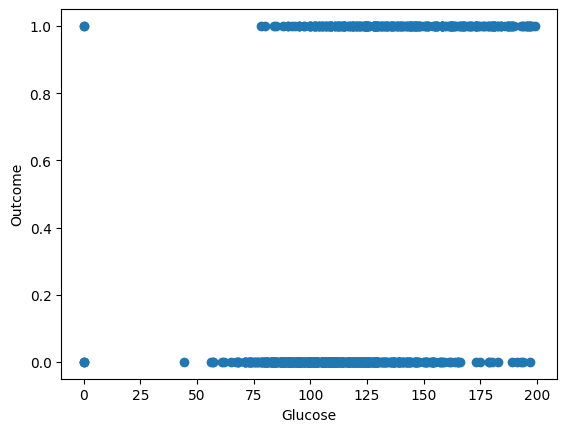

In [69]:
plt.scatter(df['Glucose'], df['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

Από το scatter plot δεν μπορούμε να βγάλουμε κάποιο γρήγορο συμπέρασμα οπότε θα βγάλουμε την συσχέτιση. Παρόλα αυτά φαίνεται ότι οι τιμές στο 1 είναι πιο συγκεντρωμένες στα δεξιά. Αυτό μας δίνει μία ένδειξη ότι κάτι μπορεί να συμβαίνει.

In [70]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


Βλέπουμε ότι η συσχέτιση έχει πολύ μεγάλη τιμή οπότε σίγουρα  παίζει κάποιο ρόλο στον διαβήτη.

# Convert DataFrame to Numpy arrays

In [71]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

# Split Dataset to Train-Test

Train Samples: 691
Test Samples: 77

In [72]:
seed = 0
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Create a Logistic Regression Model

In [73]:
model = LogisticRegression(max_iter=1000, random_state=seed, solver='liblinear')

# Train model on training set

In [74]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

# Evaluate Model on test set

In [75]:
y_pred = model.predict(x_test)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

x_train_evaluated = model.predict( x_train )
accuracy = accuracy_score( y_train, x_train_evaluated )
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 81.82
The accuracy of the model is: 76.38


#Ερώτημα 6
Παίζοντας με διάφορες τιμές για τον διαχωρισμό των δειγμάτων και τον solver που
χρησιμοποιείται. Θα έλεγα ότι βγάζω τα εξής συμπεράσματα.
Τα train data και τα test data βγάζουν παρόμοιο accuracy.
Το μοντέλο συγκλίνει ότι και μέθοδο και να βάλω και με την ίδια ακρίβεια, αυτό μου δείχνει ότι το μοντέλο μου συγκλίνει.
Ίσως χρειαζόμαστε ένα πολυονυμικό μοντέλο και όχι ένα γραμμικό.

#Ερώτημα 7
 Χωρίζουμε τo test set στα group ηλικιών

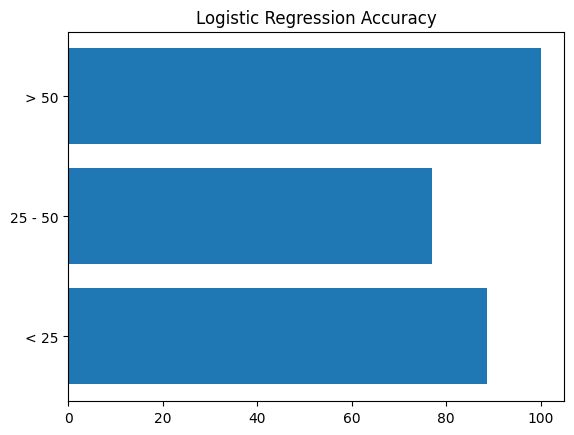

In [77]:
# Create a mask that filters patients with age < 40. Age is found at x_test[:, 7]
age_index = 7
mask_less_25 = x_test[:, age_index] < 25
mask_25_50 = (x_test[:, age_index] >= 25) & (x_test[:, age_index] < 50)
mask_above_50 = x_test[:, 7] > 50

masks = [mask_less_25, mask_25_50, mask_above_50]
y_label = ["< 25", "25 - 50", "> 50"]
accuracy_list = []
for mask in masks:
  x_masked = x_test[mask]
  y_masked = y_test[mask]
  y_pred_masked = model.predict(x_masked)
  accuracy = accuracy_score(y_masked, y_pred_masked)
  accuracy_percentage = round(accuracy*100, 2)
  accuracy_list.append(accuracy_percentage)

plt.barh(y_label, accuracy_list)
plt.title('Logistic Regression Accuracy')
plt.show()

Από το διάγραμμα φαίνεται ότι σε άτομα μεγάλυτερα των 50 έχουμε καλύτερη ακρίβεια. Αυτό είναι περίεργο και θα πρεέπει να το επιβεβαιώσουμε με άλλο seed.
Πράγματι χρησιμοποιώντας άλλο seed, στην ηλικιακή ομάδα κάτω των 25 έχουμε μεγαλύτερη ακρίβεια, όπως δηλαδή αναμενόταν.

#Ερώτημα 8
Στην συγκεκριμένη πρείπτωση νομίζω ότι το False negative είναι το χειρότερο. Καθώς μπορεί να έχει δυσμενείς συνέπειες στον ασθενή.

#Ερώτημα 9
Θα μαζέψουμε όλα τα data, μετά θα φτιάξω μία συνάρτηση που θα παίρνει το dataframe και το seed σαν είσοδο.


In [78]:
def calcAccuracyForSeed( seed, df ):
  input_df = df.drop(columns=['Outcome'])
  targets_df = df['Outcome']
  x = input_df.to_numpy()
  y = targets_df.to_numpy()
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  model = LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_percentage = round(accuracy*100, 2)

  return accuracy_percentage


for i in range(10):
  accuracy = calcAccuracyForSeed(i, df)
  print(f'The accuracy of the model for seed {i} is: {accuracy}')


The accuracy of the model for seed 0 is: 82.47
The accuracy of the model for seed 1 is: 77.92
The accuracy of the model for seed 2 is: 76.62
The accuracy of the model for seed 3 is: 74.03
The accuracy of the model for seed 4 is: 81.17
The accuracy of the model for seed 5 is: 81.17
The accuracy of the model for seed 6 is: 79.22
The accuracy of the model for seed 7 is: 79.22
The accuracy of the model for seed 8 is: 79.22
The accuracy of the model for seed 9 is: 74.68


#Ερώτημα 10


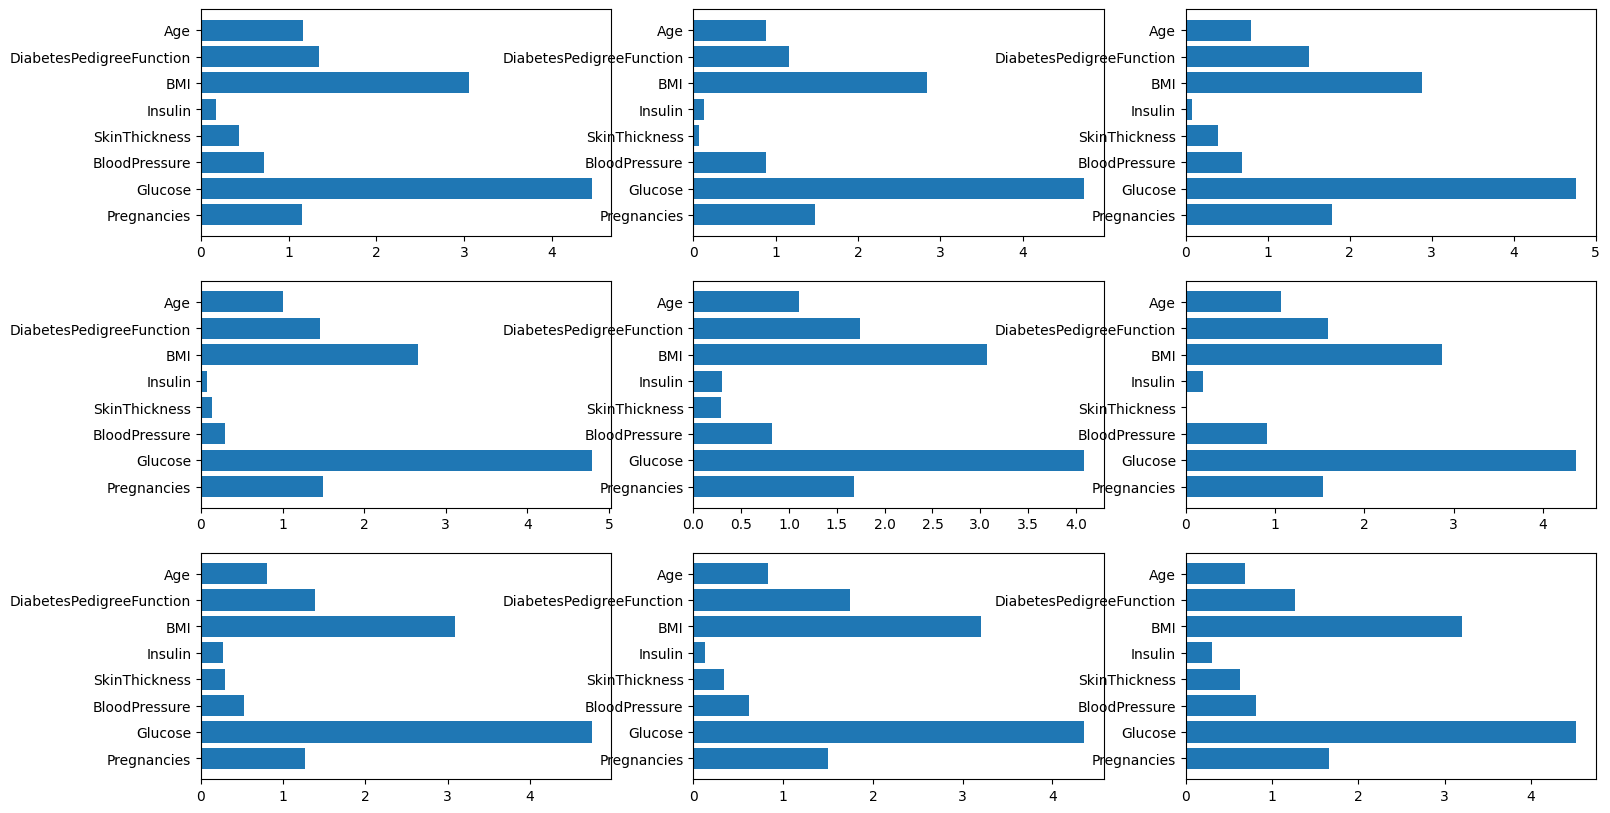

In [79]:
def calcModelForSeed( seed, df ):
  input_df = df.drop(columns=['Outcome'])
  targets_df = df['Outcome']
  x = input_df.to_numpy()
  y = targets_df.to_numpy()
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
  model = LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(x_train, y_train)

  return model

scaled_df = df.copy()

for column in scaled_df.columns:
  scaled_df[column] = (scaled_df[column] - scaled_df[column].min()) / (scaled_df[column].max() - scaled_df[column].min())

fig, a = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

for i in range(9):
  model = calcModelForSeed(i, scaled_df)
  coeffs = model.coef_[0]
  importance_weights = np.abs(coeffs)
  a[i//3, i%3].barh(input_df.columns, importance_weights)


Από το παραπάνω διάγραμμα φαίνεται ότι η γλυκόζη φαίνεται να παίζει τον μεγαλύτερο ρόλο στον διαβήτη, μαζί με τον δείκτη μάζας σώματος και τον DiabetesPedigreeFunction. Αυτό μας δείχνει ότι η γλυκόζη στο αίμα είναι το νούμερο 1 για τον διαβήτη, έπειτα είναι το BMI και τρίτον από κληρωνομικούς παράγοντες.

#Μέρος 2

In [80]:
df = pd.read_csv('diabetes.csv')
columns_to_not_drop = ['Age', 'BMI', 'Pregnancies', 'BloodPressure', 'Glucose']

for column in df.columns:
  if column not in columns_to_not_drop:
    df.drop(columns=[column], inplace=True)



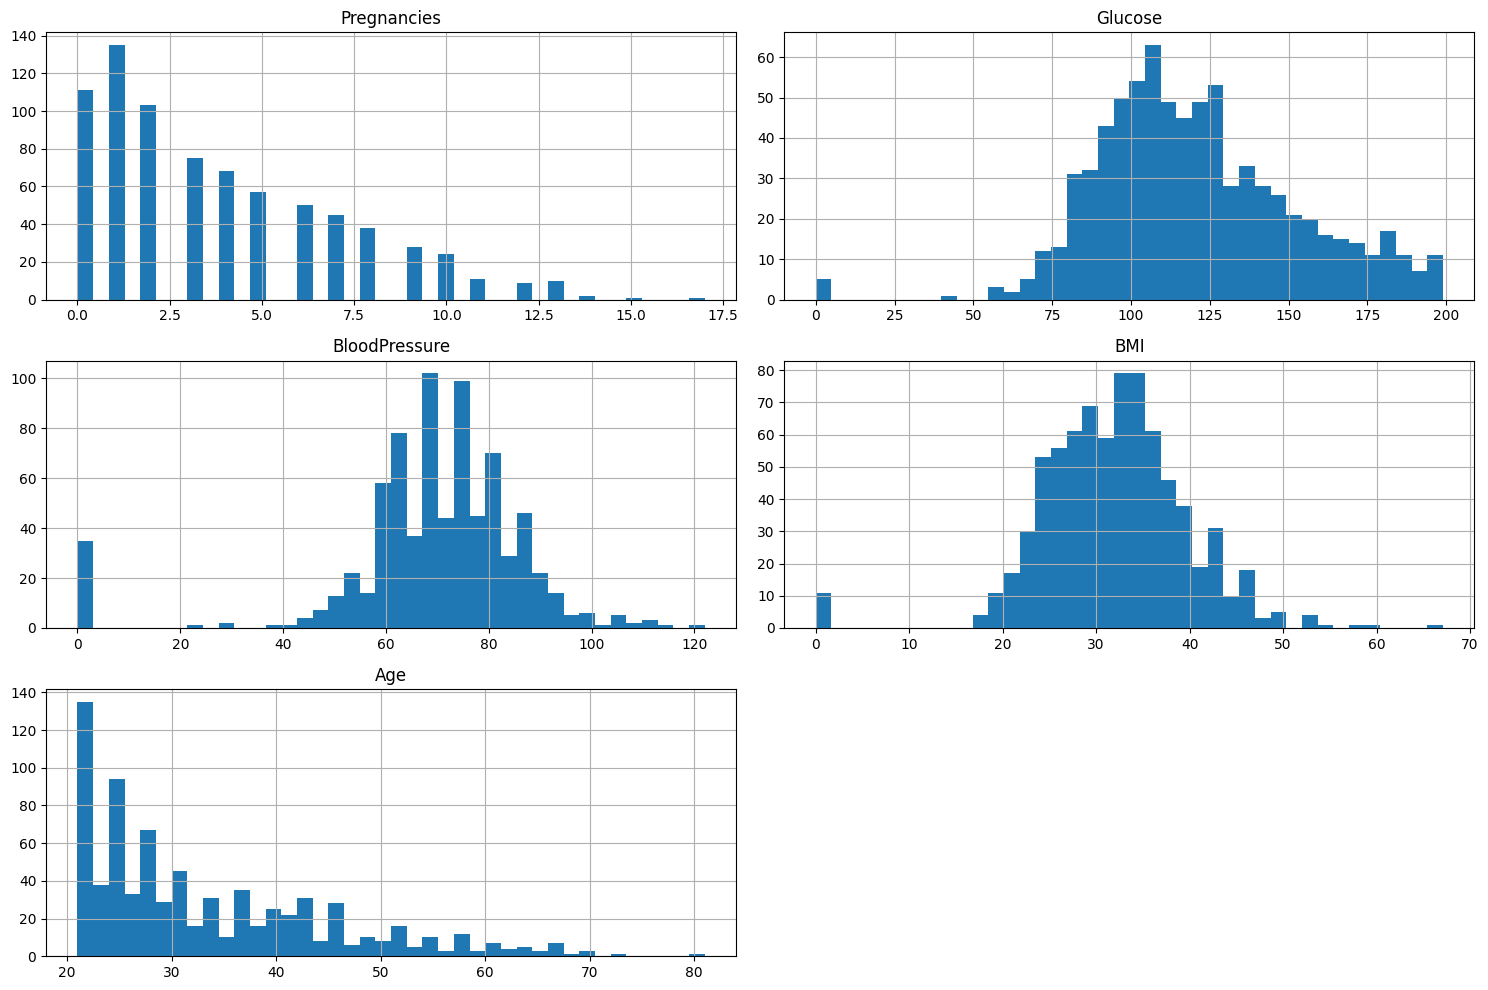

In [81]:
df.hist(bins = 40, figsize=(15, 10))
plt.tight_layout()
plt.show()

#Χωρισμός μεταβλητών και εκπαίδευση μοντέλου

In [82]:
input_df = df.drop(columns=['Glucose'])
targets_df = df['Glucose']

x = input_df.to_numpy()
y = targets_df.to_numpy()

seed = 0
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict( x_test )
mse = np.square( np.subtract( y_test,y_pred ) ).mean()
mae = np.abs( np.subtract( y_test, y_pred ) ).mean()

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print( model.coef_ )

Mean Squared Error: 1013.0231770344877
Mean Absolute Error: 24.607994483757956
[-0.2914555   0.04384088  0.90432487  0.75897564]


Σε αυτή την περίπτωση αυτό που θα χρησιμοποιούσα είναι το mae καθώς το mse είναι πιο ευαίσθητο σε μεγάλα σφάλματα καθώς το τετραγωνίζει το σφάλμα.

#Ερώτημα 3

In [83]:
def buildLassoNMeasureMae( alpha ):
  lasso = Lasso(alpha = alpha )
  lasso.fit( x_train, y_train )

  y_pred = lasso.predict( x_test )

  mse = np.square( np.subtract( y_test,y_pred ) ).mean()
  mae = np.abs( np.subtract( y_test, y_pred ) ).mean()
  print(f'Mean Absolute Error with {alpha} is : {mae}')


alphas = [ 0.2, 0.4, 0.6, 0.8, 1. ]
for alpha in alphas:
  buildLassoNMeasureMae( alpha )

Mean Absolute Error with 0.2 is : 24.59776663019881
Mean Absolute Error with 0.4 is : 24.587543364068587
Mean Absolute Error with 0.6 is : 24.577320097938365
Mean Absolute Error with 0.8 is : 24.567090831671024
Mean Absolute Error with 1.0 is : 24.556868981893007


#Ερώτημα 4

Mean Absolute Error: 24.60799448375796


<BarContainer object of 4 artists>

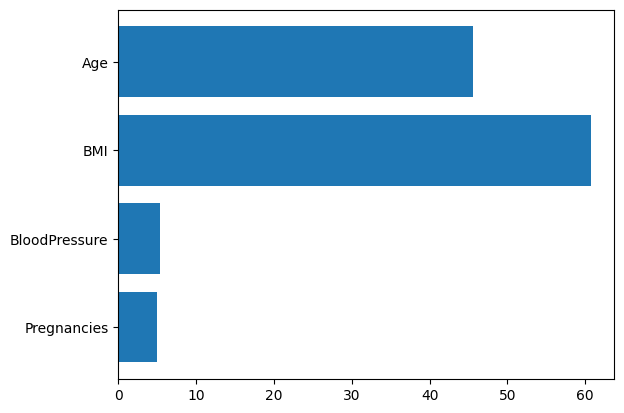

In [84]:
scaled_df = df.drop(columns=['Glucose'])

for column in scaled_df.columns:
  scaled_df[column] = (scaled_df[column] - scaled_df[column].min()) / (scaled_df[column].max() - scaled_df[column].min())

x = scaled_df.to_numpy()
y = targets_df.to_numpy()

seed = 0
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict( x_test )

mae = np.abs( np.subtract( y_test, y_pred ) ).mean()

print(f'Mean Absolute Error: {mae}')

coeffs = model.coef_
importance_weights = np.abs(coeffs)
plt.barh(scaled_df.columns, importance_weights)


Πετώντας έξω τις εγκυμοσύνες και την πίεση του αίματος επαναξετάζουμε το mae

Mean Absolute Error: 24.574239966065257
[62.60328595 43.80572444]


<BarContainer object of 2 artists>

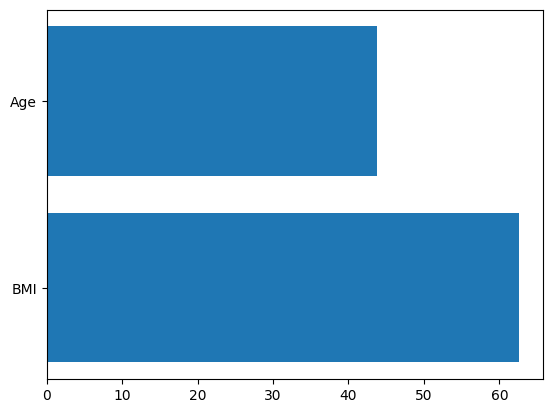

In [85]:
scaled_df = df.drop(columns=['Glucose', 'BloodPressure', 'Pregnancies'])

for column in scaled_df.columns:
  scaled_df[column] = (scaled_df[column] - scaled_df[column].min()) / (scaled_df[column].max() - scaled_df[column].min())

x = scaled_df.to_numpy()
y = targets_df.to_numpy()

seed = 0
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict( x_test )

mae = np.abs( np.subtract( y_test, y_pred ) ).mean()

print(f'Mean Absolute Error: {mae}')

print( model.coef_ )
coeffs = model.coef_
importance_weights = np.abs(coeffs)
plt.barh(scaled_df.columns, importance_weights)

Φαίνεται πως βγάζοντας τελικά και τις δύο μεταβλητές το μοντέλο μας βελτιώνει την αξιοπιστία του.